<a href="https://colab.research.google.com/github/JorgeGalarza777/SIM_YAC_GALARZA_UPSE2023/blob/main/PROYECTO_GRUPAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulador de la ecuación de difusividad, asumiendo ETA= 1**

In [22]:
# Simulador ecuacion de la difusividad
import numpy as np                    ## Permite importar librerías para crear vectores y matrices.
import math                           ## Permite importar librerías que nos ayudarán a trabajar con términos matemáticos.
L=30000                                ## Distancia total del yacimiento (ft).
dx=6000                                ## Delta x (ft).
distancia=np.arange(0,L+1,dx)         ## Crea un vector de las distancias empezando desde 0 y llegando hasta L+1, en un intervlo de "dx".
P01=np.ones_like(distancia)           ## Crea un vector inicial de presiones, este tendrá la misma forma y tamaño que el vector "distancia" y todos los elementos serán 1.
print(P01)                            ## Muestra los valores de la función solicitada.

##len (distancia)
##print (distancia)

[1 1 1 1 1 1]


In [23]:

## Condiciones iniciales

Pyac=2000                             ## Presión inicial a lo largo de todo el yacimiento (psi).
Pfrontd=0                             ## Frontera derecha (psi).
Pfronti=0                             ## Frontera izquierda (psi).
tiempo=10000                         ## Tiempo de evaluación del draw down (días)
DT=10                                 ## Intervalo de tiempo en el que se evaluará la caída de presión (días)
vectortiempo=np.arange(0,(tiempo//DT)*DT,DT) ## // Representa un vector de tiempo discreto que comienza desde cero, va hasta el valor más cercano a tiempo divisible por DT.
PXX=np.zeros(((tiempo//DT),len(distancia)))  ##Este código convierte en cero todos mis datos y me forma una matriz con "n" número de filas y "n" columnas.

Pdt=np.zeros_like(distancia)                 ##Esta línea de código convierte toda la primera fila de la matriz en ceros, para en lo posterior darle valores a las presiones que se encuentran entre las fronteras.
PXX.shape                                    ##La función shape nos muestra los numero de filas y columnas de nuestra matriz.
print (Pdt)                                  ##imprimir
##print (PXX)

[0 0 0 0 0 0]


In [24]:
P01= np.ones_like(distancia)                 ##Crea un vector inicial de presiones, este tendrá la misma forma y tamaño que el vector "distancia" y todos los elementos serán 1.
P01= P01*Pyac                                ##Este código multiplica los valores de 1 que tiene la primera fila de nuestra matriz por la presión inicial del yacimiento, estableciendo el valor inicial de todas las presiones.
P01[0]=Pfronti                               ##Establece el valor de la presión de la frontera izquierda.
P01[len(P01)-1]= Pfrontd                     ##Establece el valor de la presión en la frontera derecha.
P0in= P01                                    ##Presiones a Condición inicial
Pdt= P01                                     ##Asigna el vector P01 a Pdt que será utilizado para almacenar los resultados de las presiones en un instante de tiempo específico (dt).
t= DT                                        ##Representa la primera interacción

In [25]:
print (P01)

[   0 2000 2000 2000 2000    0]


In [26]:
def Presdt(P1,P2,P3,deltat,deltax):          ##Define los datos que se utilizaran en la ecuación.
  return ((P1 - (2*P2) + P3)/(deltax**2))*(deltat) + P2   ##Realiza el cálculo mediante la ecuación planteada para determinar la presión futura.

In [27]:
PXX[0]=P01                                  ##Asigna el valor de P01 al primer elemento de la matriz PXX.
while t< tiempo:                            ##Es un bucle while que se ejecutará mientras t sea menor que el valor de tiempo.
  for i in range(0,len(P0in)-1):            ##Es un bucle for que genera iteraciones que va desde 0 hasta la longitud total del yacimiento.
    if i==0:                                ##Es una declaración condicional que verifica si i es igual a 0.
      Pdt[i]=P0in[0]                        ##Asigna el valor de P0in[0] al elemento i de la matriz Pdt cuando i es igual a 0.
    elif i==len(P0in)-1:                    ##Es otra declaración condicional que verifica si i es igual a la longitud de P0in menos 1.
      Pdt[i]=P0in[len(P0in)-1]              ##Asigna el valor de P0in[len(P0in)-1] al elemento i de la matriz Pdt cuando i es igual a la longitud de P0in menos 1.
    else:                                   ##Es una parte de la declaración condicional que se ejecuta si ninguna de las condiciones anteriores es verdadera.
      Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)      ##Asigna el resultado de la función Presdt (pasando los valores de P0in[i-1], P0in[i], P0in[i+1], DT y dx) al elemento i de la matriz Pdt.
  PXX[(t//DT)]=Pdt                          ##Asigna los valores de la presión en el paso de tiempo actual (t) a la fila correspondiente de la matrix PXX.
  t=t+DT                                    ##Incrementa el valor de t por el valor de DT para avanzar al siguiente paso de tiempo.
  P0in=Pdt                                  ##Actualiza el vector P0in con los valores de presión en el tiempo actual (t) para utilizarlo en la próxima interacción del Bucle.
  P01=np.append(P0in,Pdt)                   ##Agrega los valores de presión en el paso del tiempo actual (t) al vector P01 utilizando la función append de numpy.
  print (P01)

[   0 1999 1999 1999 1999    0    0 1999 1999 1999 1999    0]
[   0 1998 1998 1998 1998    0    0 1998 1998 1998 1998    0]
[   0 1997 1997 1997 1997    0    0 1997 1997 1997 1997    0]
[   0 1996 1996 1996 1996    0    0 1996 1996 1996 1996    0]
[   0 1995 1995 1995 1995    0    0 1995 1995 1995 1995    0]
[   0 1994 1994 1994 1994    0    0 1994 1994 1994 1994    0]
[   0 1993 1993 1993 1993    0    0 1993 1993 1993 1993    0]
[   0 1992 1992 1992 1992    0    0 1992 1992 1992 1992    0]
[   0 1991 1991 1991 1991    0    0 1991 1991 1991 1991    0]
[   0 1990 1990 1990 1990    0    0 1990 1990 1990 1990    0]
[   0 1989 1989 1989 1989    0    0 1989 1989 1989 1989    0]
[   0 1988 1988 1988 1988    0    0 1988 1988 1988 1988    0]
[   0 1987 1987 1987 1987    0    0 1987 1987 1987 1987    0]
[   0 1986 1986 1986 1986    0    0 1986 1986 1986 1986    0]
[   0 1985 1985 1985 1985    0    0 1985 1985 1985 1985    0]
[   0 1984 1984 1984 1984    0    0 1984 1984 1984 1984    0]
[   0 19

In [28]:
PXX                                         ##Muestra los valores de presión iterados dentro de la matriz PXX.

array([[   0., 2000., 2000., 2000., 2000.,    0.],
       [   0., 1999., 1999., 1999., 1999.,    0.],
       [   0., 1998., 1998., 1998., 1998.,    0.],
       ...,
       [   0., 1003., 1003., 1003., 1003.,    0.],
       [   0., 1002., 1002., 1002., 1002.,    0.],
       [   0., 1001., 1001., 1001., 1001.,    0.]])

In [29]:
PXX.shape                                   ## Nos muestra las dimensiones de la matriz.

(1000, 6)

In [30]:
distancia.shape                             ## Nos muestra las dimensiones del vector distancia.

(6,)

Text(0, 0.5, 'Presiones (psi)')

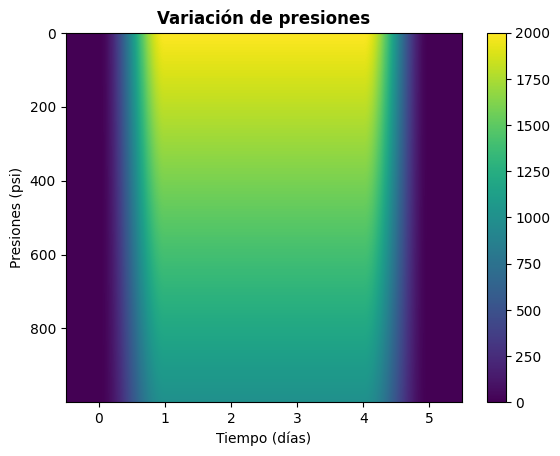

In [33]:
import matplotlib.pyplot as plt             ## Importación de la libreria que permitira realizar la gráfica.
imgplot= plt.imshow(PXX,aspect='auto')      ## Se utiliza para mostrar una imagen a partir de una matriz de datos PXX.
plt.colorbar()                              ## Se utiliza en combinación con el módulo pyplot de la biblioteca matplotlib para agregar una barra de color a un gráfico de colores o imagen.
plt.title ("Variación de presiones", fontweight ="bold")
plt.xlabel ("Tiempo (días)")
plt.ylabel ("Presiones (psi)")

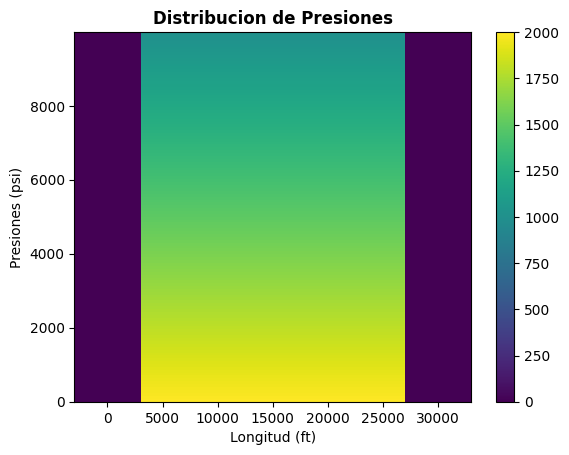

In [34]:
c = plt.pcolormesh(distancia,vectortiempo,PXX)
plt.colorbar(c)

plt.title('Distribucion de Presiones', fontweight ="bold")
plt.xlabel ("Longitud (ft)")
plt.ylabel ("Presiones (psi)")
plt.show()


In [35]:
math.pi

3.141592653589793

IndexError: ignored

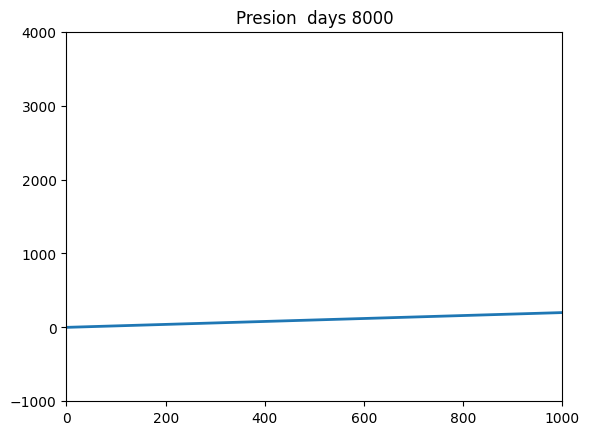

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1000))
ax.set_ylim((-1000, 4000))

line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def init():
    line2.set_data([], [])
    return (line2,)

# animation function. This is called sequentially
def animate(i):
    x = distancia
    y = PXX[i]
    line.set_data(x, y)
    #line2.set_data(y, x)
    ax.set(title='Presion  days ' + str(i*DT))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,10000,200), interval=200, blit=True)

HTML(anim.to_html5_video())

# **Simulador de la ecuación de la difusividad (Método implícito y explícito)**

In [37]:
import numpy  as np                           ## Permite importar librerías para crear vectores y matrices.
import math                                   ## Permite importar librerías que nos ayudarán a trabajar con términos matemáticos.

In [38]:
L=30000                                      ## Longitud del yacimiento
dx=6000                                      ## Diferencial de espacio
Tiempo=10000                                ## Tiempo total para el desarrollo de iteracciones.
DT=10                                         ## Diferencial de tiempo.
K=50 #Permeabilidad MD                       ## Permeabilidad.
por=0.5                                      ## Porosidad.
vis=1 # centipoise                           ## Viscosidad.
Beta=0.7                                       ## Factor volumétrico del fluido.
CompTotal=1.2**(-6) #ps1-1                     ## Compresibilidad total.
A=200000#ft^2                                ## Área del yacimiento.


In [39]:
Alpha=K/(vis*por*CompTotal)                  ## Constante de difusividad.
print (Alpha)                                ## Con este comando se envía a imprimir el valor resultante de la ecuación anterior.
Eta=(Alpha*DT)/(dx**2)                       ## índice que está en función de la constante de la difusividad.
print (Eta)

298.5983999999999
8.294399999999997e-05


In [40]:
#Esquema Explicito
def Presdt(P0,P1,P2,Eta):                   ## Con este comando definiremos las variables a usar en la ecuación.
  Pdt=P1+Eta*(P0-(2*P1)+P2)                 ## Se define la ecuación a usar utilizando los comando mencionados anteriormente.
  return(Pdt)                               ## Nos permite regresar el valor calculado

Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2))


In [45]:
#Condiciones inicialeas
Pyac=2000                                   ## Comando para definir el valor de la presión.
Piz=0                                     ## Comando para definir el valor de la presión izquierda.
Pder=0                                      ## Comando para definir el valor de la presión derecha
Pin=np.ones((L//dx))                      ## Crea un vector inicial de presiones, este tendrá la misma forma y tamaño que el vector "(L//dx)+2" y todos los elementos serán 1.
Pres=np.zeros((L//dx))                    ## Este código convierte en cero todos mis datos.
#Pres2=np.zeros((L//dx)+2)                   ## Este código convierte en cero todos mis datos.
Pin=Pin*Pyac                                ## En este punto calculamos la presión inicial.
Pin[0]=Piz                         ##
Pin[len(Pin)-1]=Pder      ##

Pin.shape
print (Pin)

[   0. 2000. 2000. 2000.    0.]


In [46]:
Pdt

array([   0, 2000, 2000, 2000, 2000,    0])

In [ ]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))                       ## Generamos una matriz llena de ceros de filas "Tiempo//DT" vs columnas "(L//dx)+2"
Qimplicita=np.zeros((Tiempo//DT,(L//dx)))                         ## Generamos una matriz llena de ceros de fila "Tiempo//DT" vs columnas "(L//dx)"
Pin=np.ones((L//dx)+2)                                            ## Genera un vector llenos de "1" de dimensión "(L//dx)+2"
Pres=np.zeros((L//dx)+2)                                          ## Genera un vector llenos de ceros de dimensión "(L//dx)+2"
Pin=Pin*Pyac                                                      ## Se asigna el valor de la Pyac al vector Pin
Pin[0]=Piz                                                        ## Se asigna el valor de la frontera izquierda a la presión de la posición "0"
Pin[len(Pin)-1]=Pder                                              ## Se asigna el valor de la frontera derecha a la presión de la posición final del vector Pin
N=(L//dx)+2                                                       ## Calculamos la cantidad de nodos o columnas de nuestro sistema
Baccumul=A*dx*por*CompTotal/Beta                                  ## Definimos el valor del volumen acumulado
Transmisibilidad=(K*A/(vis*Beta*dx))*6.33*10**-3                  ## Definimos el valor de la transmisibilidad
B=np.zeros([N-2,N-2])
T=np.zeros([N-2,N-2])
Transmisibilidad


25.32

In [ ]:
Pin

array([ 500., 1000., 1000., 1000., 1000.,    0.])

In [ ]:
for i in range(0,N-2):                                            ## Creamos un bucle que repetirá el ciclo mientras la condición se cumpla
  B[i,i]=Baccumul                                                 ## Permite establecer valores para la diagonal de la matriz usando los valores de volumen acumulado

for i in range(0,N-2):                                            ## Creamos un bucle que repetirá el ciclo mientras la condición se cumpla
  T[i,i]=2*Transmisibilidad                                       ## Permite establecer valores para la diagonal de la matriz usando los valores de transmisibilidad
  if i>0:
    T[i,i-1]=-Transmisibilidad
  if i<(N-3):
    T[i,i+1]=-Transmisibilidad
T[0,0]=3*Transmisibilidad
T[N-3,N-3]=Transmisibilidad



In [ ]:
Matriz_resolucion=np.zeros_like(T)                               ## Creamos una matriz "resolución" llena de ceros con las mismas dimensiones de la matriz "T"
Vector_sol=np.zeros_like(Pin[1:-1])                              ## Creamos una matriz llena de ceros con las mismas dimensiones de la matriz "Pin" pero sin considerar las fronteras (-2)
Matriz_resolucion=T+(B/DT)                                       ## Empezamos a resolver el sistema de ecuaciones
Vector_sol=np.matmul(B/DT,Pin[1:-1])                             ## Creamos una matriz solución
#Pres=[]
Q=np.zeros_like(Vector_sol)                                      ## Creamos un vector lleno de ceros de la misma longitud del vector solución
Q[0]=2*Transmisibilidad*Piz                                      ## Reemplazamos el valor de Q en la posición "0"
Vector_sol=Vector_sol+Q                                          ## Generamos un vector resultante
Vector_sol
#Transmisibilidad


array([1.00000025e+11, 1.00000000e+11, 1.00000000e+11, 1.00000000e+11])

In [ ]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)               ## Resuelve una ecuación matricial lineal o un sistema de ecuaciones escalares lineales.
Pcal


array([ 999.9997468, 1000.       , 1000.       , 1000.       ])

In [ ]:
Vector_sol                                                       ##

array([1.00000025e+11, 1.00000000e+11, 1.00000000e+11, 1.00000000e+11])

In [ ]:
Qimplicita[0]=Q
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(B/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol
  t=t+DT

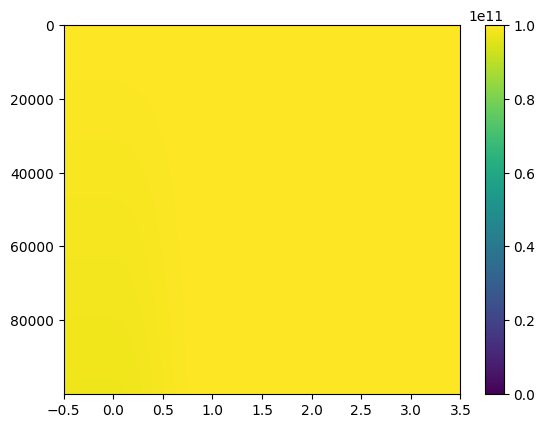

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()

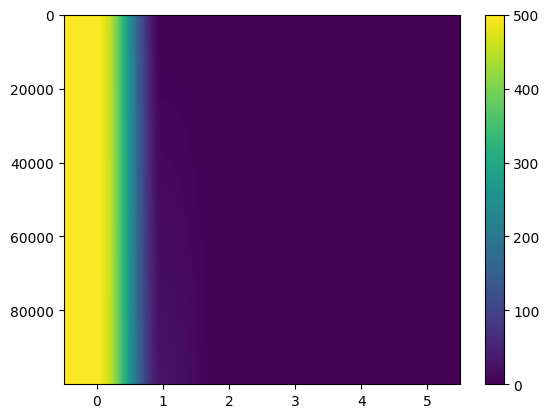

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()